In [83]:
#pip install scikit-fuzzy
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.membership as mf
import matplotlib.pyplot as plt
import math
import random

In [84]:
dataset = pd.read_csv('student-por.csv', sep=';')

In [85]:
dataset = dataset.drop(['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','freetime','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','Dalc','Walc','G1','G2'],axis=1)

In [86]:
dataset.head()

,failures,famrel,goout,health,absences,G3
0,0,4,4,3,4,11
1,0,5,3,3,2,11
2,0,4,2,3,6,12
3,0,3,2,5,0,14
4,0,4,2,5,0,13


In [87]:
dataset[['famrel', 'failures', 'goout', 'health', 'absences', 'G3']].max()

famrel       5
failures     3
goout        5
health       5
absences    32
G3          19
dtype: int64

In [88]:
dataset[['famrel', 'failures', 'goout', 'health', 'absences', 'G3']].min()

famrel      1
failures    0
goout       1
health      1
absences    0
G3          0
dtype: int64

In [89]:
x_famrel = np.arange(1, 6, 1)
x_goout = np.arange(1, 6, 1)
x_pass = np.arange(0, 5, 1)
x_attendance = np.arange(0, 33, 1)
x_health = np.arange(1, 6, 1)
x_grade = np.arange(0, 21, 1)
y_mentalindex = np.arange(0, 1, 1/(729))



In [90]:


'''input_famrel = int(input("input_famrel"))
input_goout = int(input("input_goout"))
input_pass = int(input("input_pass"))
input_attendance = int(input("input_attendance"))
input_health = int(input("input_health: "))
input_grade = int(input("input_grade: "))'''


'input_famrel = int(input("input_famrel"))\ninput_goout = int(input("input_goout"))\ninput_pass = int(input("input_pass"))\ninput_attendance = int(input("input_attendance"))\ninput_health = int(input("input_health: "))\ninput_grade = int(input("input_grade: "))'

In [91]:
famrel_low = mf.trimf(x_famrel, [-1, 1, 3])
famrel_med = mf.trimf(x_famrel, [1, 3, 5]) 
famrel_high = mf.trimf(x_famrel, [3, 5, 7])

goout_low = mf.trimf(x_goout, [-1, 1, 3])
goout_med = mf.trimf(x_goout, [1, 3, 5]) 
goout_high = mf.trimf(x_goout, [3, 5, 7])

pass_low = mf.trimf(x_pass, [-0.1, 1, 2])
pass_med = mf.trimf(x_pass, [1, 2, 3]) 
pass_high = mf.trimf(x_pass, [2, 3, 4])

health_low = mf.trimf(x_health, [-1, 1, 3])
health_med = mf.trimf(x_health, [1, 3, 5]) 
health_high = mf.trimf(x_health, [3, 5, 7])

attendance_low = mf.trimf(x_attendance, [-0.1, 8, 16])
attendance_med = mf.trimf(x_attendance, [8, 16, 24]) 
attendance_high = mf.trimf(x_attendance, [16, 24, 32.1])

grade_low = mf.trimf(x_grade, [-0.1, 5, 10])
grade_med = mf.trimf(x_grade, [5, 10, 15]) 
grade_high = mf.trimf(x_grade, [10, 15, 20])

risk_low = mf.trimf(y_mentalindex, [0 ,2 ,4])
risk_med = mf.trimf(y_mentalindex, [2 ,4 ,6])
risk_high = mf.trimf(y_mentalindex, [4 ,7 ,10])
risk = [risk_low,risk_med,risk_high]


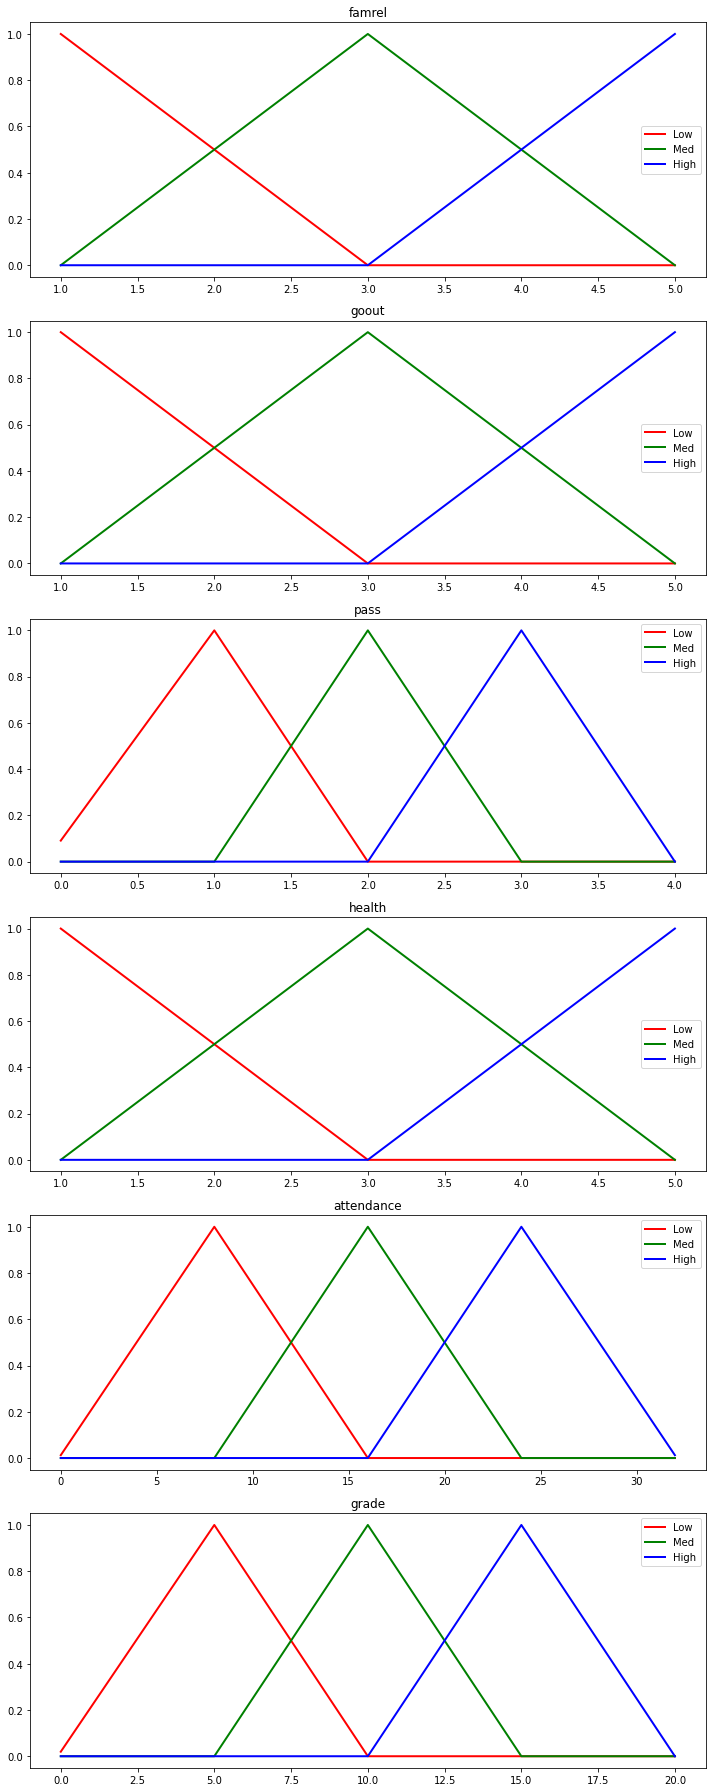

In [92]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 6, figsize =(10, 25))

ax0.plot(x_famrel, famrel_low, 'r', linewidth = 2, label = 'Low')
ax0.plot(x_famrel, famrel_med, 'g', linewidth = 2, label = 'Med')
ax0.plot(x_famrel, famrel_high, 'b', linewidth = 2, label = 'High')
ax0.set_title('famrel')
ax0.legend()

ax1.plot(x_goout, goout_low, 'r', linewidth = 2, label = 'Low')
ax1.plot(x_goout, goout_med, 'g', linewidth = 2, label = 'Med')
ax1.plot(x_goout, goout_high, 'b', linewidth = 2, label = 'High')
ax1.set_title('goout')
ax1.legend()

ax2.plot(x_pass, pass_low, 'r', linewidth = 2, label = 'Low')
ax2.plot(x_pass, pass_med, 'g', linewidth = 2, label = 'Med')
ax2.plot(x_pass, pass_high, 'b', linewidth = 2, label = 'High')
ax2.set_title('pass')
ax2.legend()

ax3.plot(x_health, health_low, 'r', linewidth = 2, label = 'Low')
ax3.plot(x_health, health_med, 'g', linewidth = 2, label = 'Med')
ax3.plot(x_health, health_high, 'b', linewidth = 2, label = 'High')
ax3.set_title('health')
ax3.legend()

ax4.plot(x_attendance, attendance_low, 'r', linewidth = 2, label = 'Low')
ax4.plot(x_attendance, attendance_med, 'g', linewidth = 2, label = 'Med')
ax4.plot(x_attendance, attendance_high, 'b', linewidth = 2, label = 'High')
ax4.set_title('attendance')
ax4.legend()

ax5.plot(x_grade, grade_low, 'r', linewidth = 2, label = 'Low')
ax5.plot(x_grade, grade_med, 'g', linewidth = 2, label = 'Med')
ax5.plot(x_grade, grade_high, 'b', linewidth = 2, label = 'High')
ax5.set_title('grade')
ax5.legend()

plt.tight_layout()

In [93]:
mentalHealth =[]
for index, row in dataset.iterrows():
    input_famrel = row['famrel']
    input_goout = row['goout']
    input_pass = row['failures']
    input_attendance = row['absences']
    input_health = row['health']
    input_grade = row['G3']

    famrel_fit_low = fuzz.interp_membership(x_famrel, famrel_low, input_famrel)
    famrel_fit_med = fuzz.interp_membership(x_famrel, famrel_med, input_famrel)
    famrel_fit_high = fuzz.interp_membership(x_famrel, famrel_high, input_famrel)
    famrel_fit = [famrel_fit_low,famrel_fit_med,famrel_fit_high]

    goout_fit_low = fuzz.interp_membership(x_goout, goout_low, input_goout)
    goout_fit_med = fuzz.interp_membership(x_goout, goout_med, input_goout)
    goout_fit_high = fuzz.interp_membership(x_goout, goout_high , input_goout)
    goout_fit = [goout_fit_low,goout_fit_med,goout_fit_high]

    pass_fit_low = fuzz.interp_membership(x_pass, pass_low, input_pass)
    pass_fit_med = fuzz.interp_membership(x_pass, pass_med, input_pass)
    pass_fit_high = fuzz.interp_membership(x_pass, pass_high , input_pass)
    pass_fit = [pass_fit_low,pass_fit_med,pass_fit_high]

    health_fit_low = fuzz.interp_membership(x_health, health_low, input_health)
    health_fit_med = fuzz.interp_membership(x_health, health_med, input_health)
    health_fit_high = fuzz.interp_membership(x_health, health_high , input_health)
    health_fit = [health_fit_low,health_fit_med,health_fit_high]

    attendance_fit_low = fuzz.interp_membership(x_attendance, attendance_low, input_attendance)
    attendance_fit_med = fuzz.interp_membership(x_attendance, attendance_med, input_attendance)
    attendance_fit_high = fuzz.interp_membership(x_attendance, attendance_high , input_attendance)
    attendance_fit = [attendance_fit_low,attendance_fit_med,attendance_fit_high]

    grade_fit_low = fuzz.interp_membership(x_grade, grade_low, input_grade)
    grade_fit_med = fuzz.interp_membership(x_grade, grade_med, input_grade)
    grade_fit_high = fuzz.interp_membership(x_grade, grade_high , input_grade)
    grade_fit = [grade_fit_low,grade_fit_med,grade_fit_high]

    #print(famrel_fit)
    #print(goout_fit)
    #print(pass_fit)
    #print(health_fit)
    #print(attendance_fit)
    #print(grade_fit)
    
    rule = [] #729
    for n_fam in range(3):
        for n_goout in range(3):
            for n_pass in range(3):
                for n_health in range(3):
                    for n_att in range(3):
                        for n_grade in range(3):
                            if famrel_fit[2] >0.0 and goout_fit[2] >0.0 and pass_fit[2] >0.0 and health_fit[2] >0.0 and attendance_fit[2] >0.0 and grade_fit[2] >0.0:
                                temp_rule =np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(famrel_fit[n_fam] ,goout_fit[n_goout]),pass_fit[n_pass]), health_fit[n_health]),attendance_fit[n_att]), grade_fit[n_grade])
                            else:
                                temp_rule =np.fmax(np.fmin(np.fmax(np.fmin(np.fmax(famrel_fit[n_fam] ,goout_fit[n_goout]),pass_fit[n_pass]), health_fit[n_health]),attendance_fit[n_att]), grade_fit[n_grade])
                            rule.append(temp_rule)
    rule = np.array(rule)
    # for any values in high triangles we used all fmax, else we used a combination of fmax and fmin function.
    #print(rule)
    
    defuzzified  = fuzz.defuzz(y_mentalindex, rule,'centroid')

    result = fuzz.interp_membership(y_mentalindex, rule, defuzzified)
    mentalHealth.append(result)
    #print("Mental Health Index:", result)



In [94]:
dataset["Mental_Health_Index"] = mentalHealth
print(dataset)

     failures  famrel  goout  health  absences  G3  Mental_Health_Index
0           0       4      4       3         4  11             0.664162
1           0       5      3       3         2  11             0.702186
2           0       4      2       3         6  12             0.411202
3           0       3      2       5         0  14             0.304763
4           0       4      2       5         0  13             0.430756
..        ...     ...    ...     ...       ...  ..                  ...
644         1       5      2       5         4  10             0.822379
645         0       4      4       1         4  16             0.000000
646         0       1      1       5         6   9             0.637863
647         0       2      5       2         6  10             0.195048
648         0       4      1       5         4  11             0.386451

[649 rows x 7 columns]


In [102]:
dataset.to_excel('output.xlsx',index=False)